In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
import numpy as np 
import pandas as pd 

In [41]:
copied_path = "/content/gdrive/MyDrive/AIML/projects/NLPSarcasticReview/Sarcasm_Headlines_Dataset.json" 

df = pd.read_json(copied_path, lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


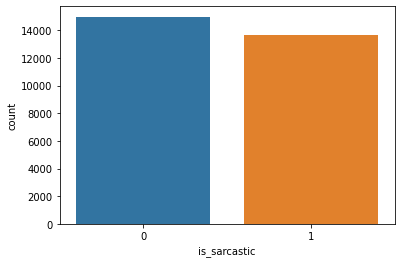

In [43]:
#EDA
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(df.is_sarcastic)
plt.show()

In [44]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 


import tensorflow.keras.layers as L 
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
from tensorflow.keras.optimizers import Adam 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics  import classification_report 

import nltk 
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import TweetTokenizer, word_tokenize 
from nltk.corpus import stopwords 

import re

In [45]:
# DATA PREOPROCESSING 

X = df['headline']
y = df['is_sarcastic']

In [46]:
nltk.download('stopwords')
stop_words = stopwords.words('english')


def data_cleaner(headline):
    # remove url 
    headline = re.sub(r'http\S+', '', headline)
    
    # remove html tags 
    headline = re.sub(r'<.*?>+', '', headline)

    
    headline = re.sub(r'\d+', '', headline)
    
    headline = re.sub(r'#\w+', '', headline)
    
    headline = re.sub(r'@\w+' ,'', headline)

    
    # removing stop words 
    headline = headline.split()
    headline = " ".join([word for word in headline if not word in stop_words])
    
    return headline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
X_cleaned = X.apply(data_cleaner)
X_cleaned.head()

0    thirtysomething scientists unveil doomsday clo...
1    dem rep. totally nails congress falling short ...
2           eat veggies: deliciously different recipes
3         inclement weather prevents liar getting work
4    mother comes pretty close using word 'streamin...
Name: headline, dtype: object

In [48]:
X.head()

0    thirtysomething scientists unveil doomsday clo...
1    dem rep. totally nails why congress is falling...
2    eat your veggies: 9 deliciously different recipes
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word 'strea...
Name: headline, dtype: object

In [49]:
X.shape

(28619,)

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)

X = tokenizer.texts_to_sequences(X_cleaned)

vocab_size = len(tokenizer.word_index)+1

print("Vocab size {}".format(vocab_size))
print("\nExample: \n")
print("Sentence : \n{}".format(X_cleaned[50]))
print("\nAfter the tokenizing: \n{}".format(X[50]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n {}".format(X[50]))
print("\nX shape after padding :\n {}".format(X.shape))


Vocab size 30275

Example: 

Sentence : 
lgbt christians speak out: "love sinner, hate sin" cut anymore

After the tokenizing: 
[710, 4898, 1060, 564, 73, 11192, 552, 7267, 674, 1353]

After padding :
 [  710  4898  1060   564    73 11192   552  7267   674  1353     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0]

X shape after padding :
 (28619, 107)


In [51]:
embedding_dim = 16
max_length = X.shape[1]
print("\max_length :\n {}".format(max_length))

\max_length :
 107


In [52]:
# Modeling Building and training 
tf.keras.backend.clear_session()

#Bidirectional GATED RECURRENT UNIT (GRU)

In [53]:
#Building the GRU Model
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 107, 16)           484400    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                3264      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 487,869
Trainable params: 487,869
Non-trainable params: 0
_________________________________________________________________


In [55]:



model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
batch_size=1000

training_history = model_gru.fit(X, y, epochs=num_epochs, validation_split=0.2, 
                            batch_size=batch_size)

Epoch 1/20
23/23 [==============================] - 12s 291ms/step - loss: 0.6903 - accuracy: 0.5285 - val_loss: 0.6813 - val_accuracy: 0.5653
Epoch 2/20
23/23 [==============================] - 6s 254ms/step - loss: 0.6713 - accuracy: 0.6561 - val_loss: 0.6448 - val_accuracy: 0.7194
Epoch 3/20
23/23 [==============================] - 6s 253ms/step - loss: 0.6060 - accuracy: 0.7935 - val_loss: 0.5427 - val_accuracy: 0.7745
Epoch 4/20
23/23 [==============================] - 6s 252ms/step - loss: 0.4416 - accuracy: 0.8581 - val_loss: 0.4318 - val_accuracy: 0.7937
Epoch 5/20
23/23 [==============================] - 6s 254ms/step - loss: 0.2737 - accuracy: 0.8951 - val_loss: 0.4104 - val_accuracy: 0.8087
Epoch 6/20
23/23 [==============================] - 6s 253ms/step - loss: 0.1901 - accuracy: 0.9328 - val_loss: 0.4199 - val_accuracy: 0.8134
Epoch 7/20
23/23 [==============================] - 6s 253ms/step - loss: 0.1396 - accuracy: 0.9539 - val_loss: 0.4551 - val_accuracy: 0.8103
Epoch

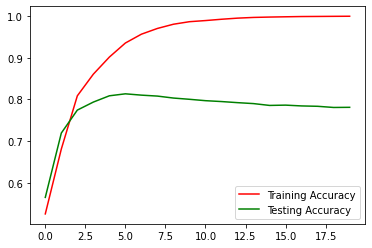

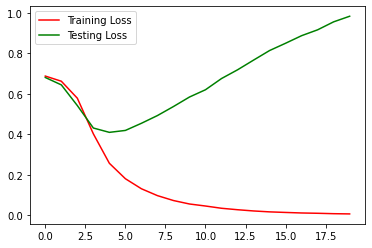

In [56]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=training_history.history['accuracy']
val_acc=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# Bidirectional LONG SHORT TERM MEMORY (LSTM)

In [57]:
#Building the LSTM Bi-Directional Model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 107, 16)           484400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 488,829
Trainable params: 488,829
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
batch_size=1000

training_history = model_lstm.fit(X, y, epochs=num_epochs, validation_split=0.2, batch_size=batch_size)

Epoch 1/20
23/23 [==============================] - 11s 305ms/step - loss: 0.6922 - accuracy: 0.5162 - val_loss: 0.6884 - val_accuracy: 0.5266
Epoch 2/20
23/23 [==============================] - 6s 268ms/step - loss: 0.6846 - accuracy: 0.5271 - val_loss: 0.6697 - val_accuracy: 0.5683
Epoch 3/20
23/23 [==============================] - 6s 265ms/step - loss: 0.6507 - accuracy: 0.6463 - val_loss: 0.6119 - val_accuracy: 0.7580
Epoch 4/20
23/23 [==============================] - 6s 267ms/step - loss: 0.5655 - accuracy: 0.8086 - val_loss: 0.5318 - val_accuracy: 0.7755
Epoch 5/20
23/23 [==============================] - 6s 265ms/step - loss: 0.4507 - accuracy: 0.8580 - val_loss: 0.4695 - val_accuracy: 0.7952
Epoch 6/20
23/23 [==============================] - 6s 268ms/step - loss: 0.3550 - accuracy: 0.8874 - val_loss: 0.4412 - val_accuracy: 0.7959
Epoch 7/20
23/23 [==============================] - 6s 265ms/step - loss: 0.2799 - accuracy: 0.9158 - val_loss: 0.4189 - val_accuracy: 0.8033
Epoch

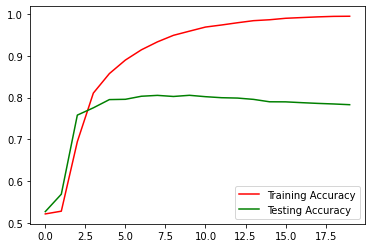

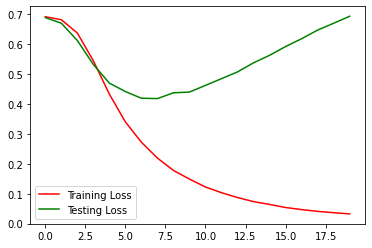

In [60]:

#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=training_history.history['accuracy']
val_acc=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()